# Apple (AAPL) Stock Price Prediction

## Problem Statement

The goal of this project is to predict the next day’s closing stock price of Apple Inc. (AAPL) using historical Open, High, Low, and Volume values. Two machine learning models are used for regression:

- Linear Regression
- Random Forest Regressor

Evaluate the model using Mean Squared Error and visualize actual vs. predicted closing prices.


In [ ]:
# Install yfinance to download stock data
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\zaina\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Data Collection

Use `yfinance` to download Apple (AAPL) stock data from 2020 to mid-2025. The target variable is the next day's closing price.


In [ ]:
# Download stock data
data = yf.download('AAPL', start='2020-01-01', end='2025-05-31')
data

C:\Users\zaina\AppData\Local\Temp\ipykernel_16172\4107804211.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2025-05-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487869,72.526556,70.783271,71.034732,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200
...,...,...,...,...,...
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500


## Data Preprocessing

I used the following columns as features:
- Open
- High
- Low
- Volume

The target variable is created by shifting the 'Close' column one step into the future.


In [ ]:
# Creating target column 
data['Target'] = data['Close'].shift(-1)
# Droping the last row
data.dropna(inplace=True)

# Selecting features and target
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Target']

print(features.tail())
print(target.tail())

Price             Open        High         Low    Volume
Ticker            AAPL        AAPL        AAPL      AAPL
Date                                                    
2025-05-22  200.710007  202.750000  199.699997  46742400
2025-05-23  193.669998  197.699997  193.460007  78432900
2025-05-27  198.300003  200.740005  197.429993  56288500
2025-05-28  200.589996  202.729996  199.899994  45339700
2025-05-29  203.580002  203.809998  198.509995  51396800
Date
2025-05-22    195.270004
2025-05-23    200.210007
2025-05-27    200.419998
2025-05-28    199.949997
2025-05-29    200.850006
Name: Target, dtype: float64


## Model Training

Spliting the data into training and testing sets without shuffling to preserve time order. Then training two models:
- Linear Regression
- Random Forest Regressor


In [ ]:
# Spliting data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,shuffle=False)

# Trianing Linear Regression model
Linear_Regression_model=LinearRegression()
Linear_Regression_model.fit(x_train, y_train)
Linear_Regression_predictions = Linear_Regression_model.predict(x_test)

# MSE calculation for Linear Regression Model
Linear_Regression_MSE=mean_squared_error(y_test,Linear_Regression_predictions)
print("Mean Squared Error Linear Regression= ",Linear_Regression_MSE)

# Training Random Forest Model
RandForest_model = RandomForestRegressor(n_estimators=100, random_state=42)
RandForest_model.fit(x_train, y_train)
RandForest_predictions = RandForest_model.predict(x_test)

# MSE calculation for Random Forest Model
RandForest_MSE=mean_squared_error(y_test,RandForest_predictions)
print("Mean Squared Error Random Forest= ",RandForest_MSE)

Mean Squared Error Linear Regression=  20.098259329302387
Mean Squared Error Random Forest=  968.3444568537238


## Visualization: Actual vs Predicted Closing Prices

Plotting actual closing prices and compare them with predictions from both models.


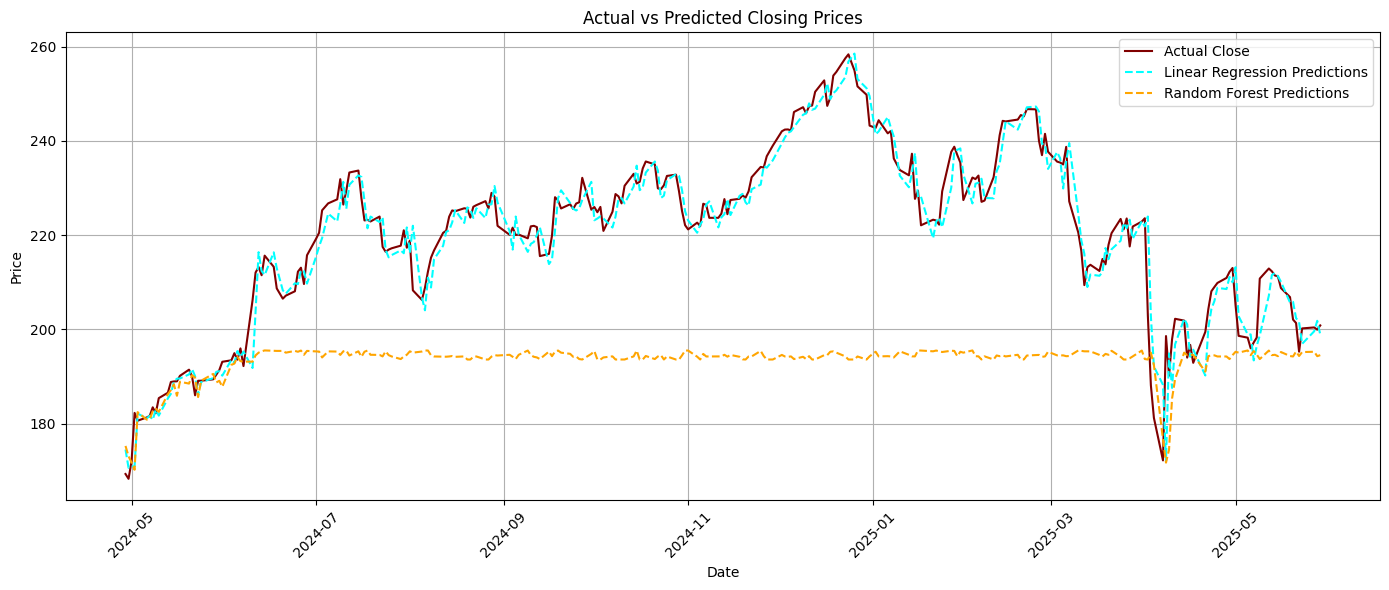

In [ ]:
# Actual vs Predicted prices plotting
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test.values, label='Actual Close', color='maroon')
plt.plot(y_test.index, Linear_Regression_predictions, label='Linear Regression Predictions', linestyle='--', color='cyan')
plt.plot(y_test.index, RandForest_predictions, label='Random Forest Predictions', linestyle='--', color='orange')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()